### **Importing Data** 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [10]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### **Visualizing the data**

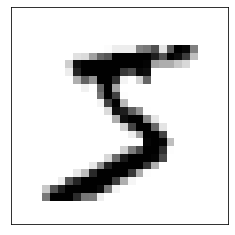

In [16]:
import matplotlib as mlp
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = 'binary')
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
y[0]  # target variable

'5'

In [28]:
import numpy as np
y = y.astype(np.uint8) # converting from object to unsigned integer 
y.dtype

dtype('uint8')

The training set is well shuffeled, some learning algorithms are sensitive to the order of the trining instances and they perform poorly if they get many similar instances in a row. Shuffling enures this won't happen

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **Binary Classification**

In [32]:
# binary classifier detects if that particular feature is present or not
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 97)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

### **Performance Measure**

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.9406 , 0.96605, 0.96255])

In [34]:
from sklearn.base import BaseEstimator

class Never_5_classifier(BaseEstimator):  # dumb classifier
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)


In [35]:
never_5_clf = Never_5_classifier()
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.9406 , 0.96605, 0.96255])

This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. We need a correct method for calculating precision of our algorithm